In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import data_cleaning_visualization as dcv
cleaner=dcv.DataCleaningAndVisualization()

In [2]:
df = pd.read_csv("Data.csv")
df_1 = df

In [3]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [5]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,Favorite Color,object,3,0,"[Cool, Warm, Neutral]",4
1,Favorite Music Genre,object,7,0,"[Rock, Pop, Hip hop, Electronic, R&B and soul,...",4
2,Favorite Beverage,object,6,0,"[Doesn't drink, Beer, Other, Wine, Vodka, Whis...",4
3,Favorite Soft Drink,object,4,0,"[Coca Cola/Pepsi, Fanta, 7UP/Sprite, Other]",4
4,Gender,object,2,0,"[F, M]",4


No nulls found.

In [6]:
df.duplicated().sum()

4

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
59,Cool,Pop,Whiskey,Other,M
60,Cool,Electronic,Whiskey,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [9]:
df['Favorite Color'].value_counts()

Favorite Color
Cool       33
Warm       22
Neutral     7
Name: count, dtype: int64

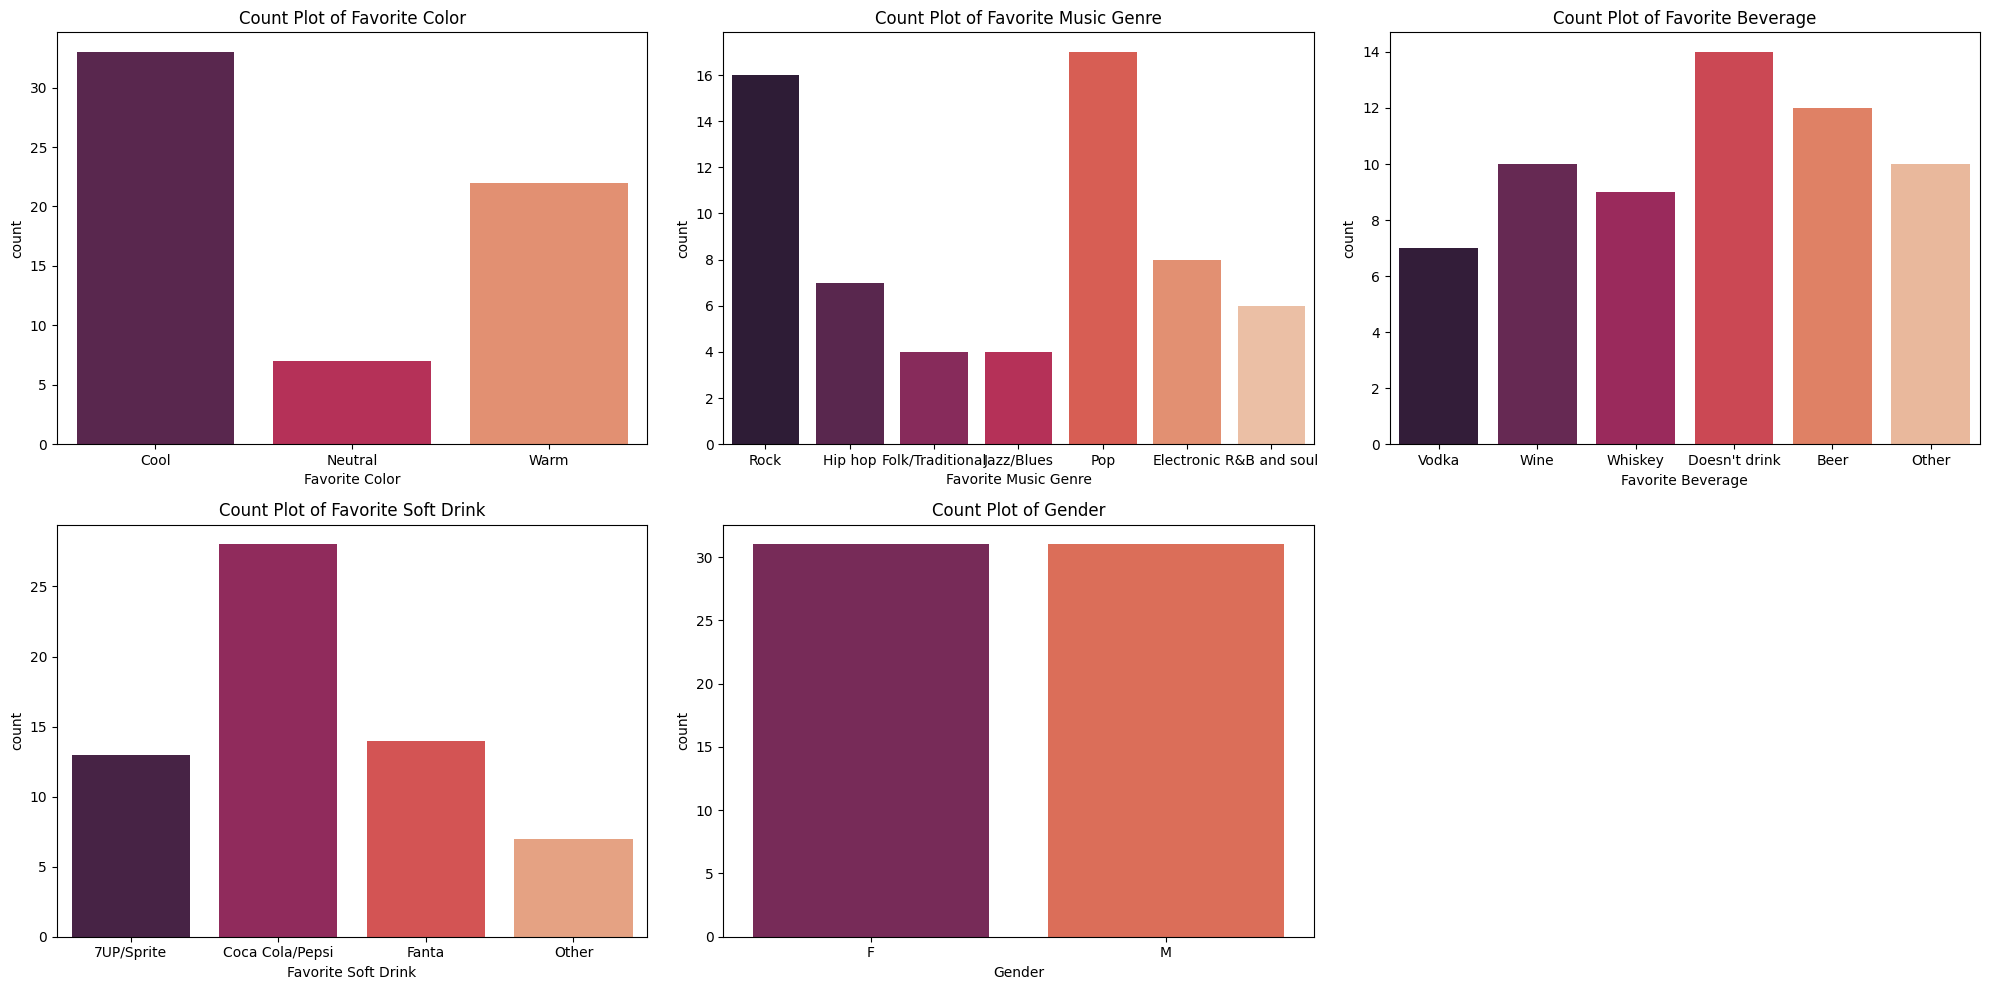

In [10]:
cleaner.categorical_plot(df,df.columns,7)

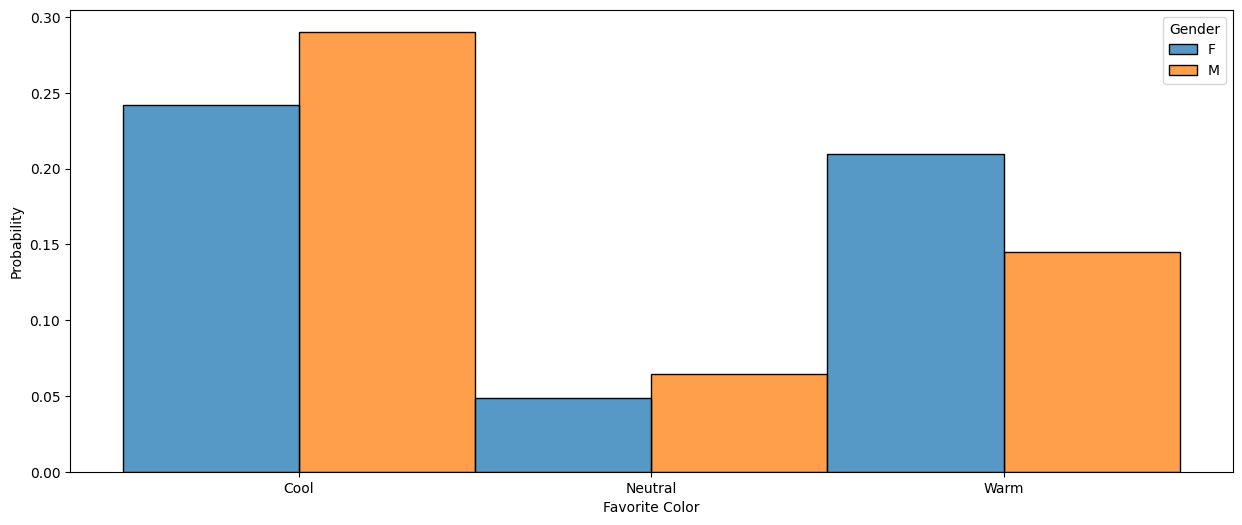

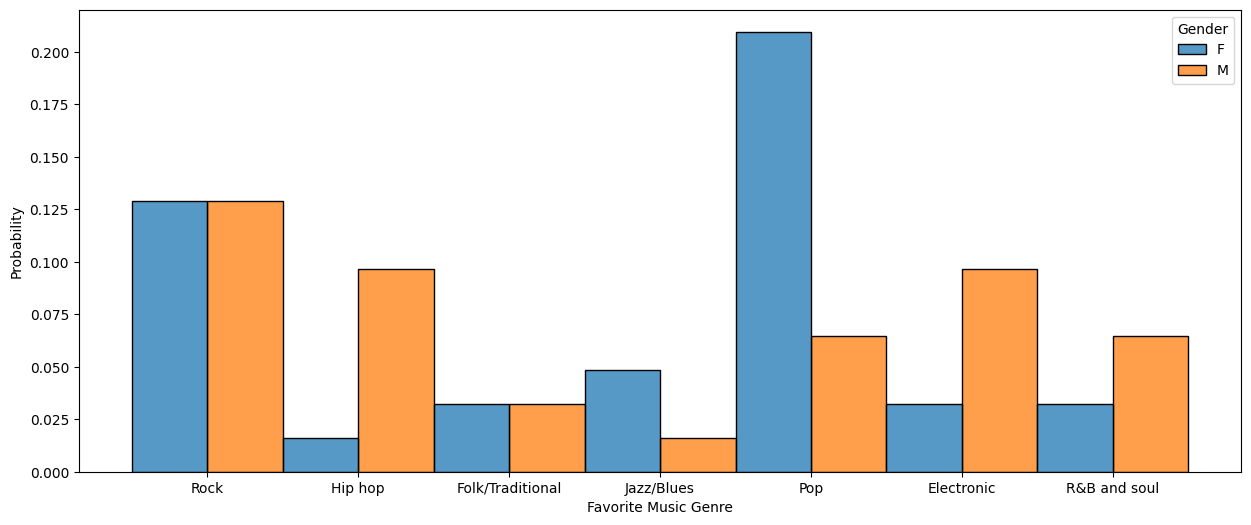

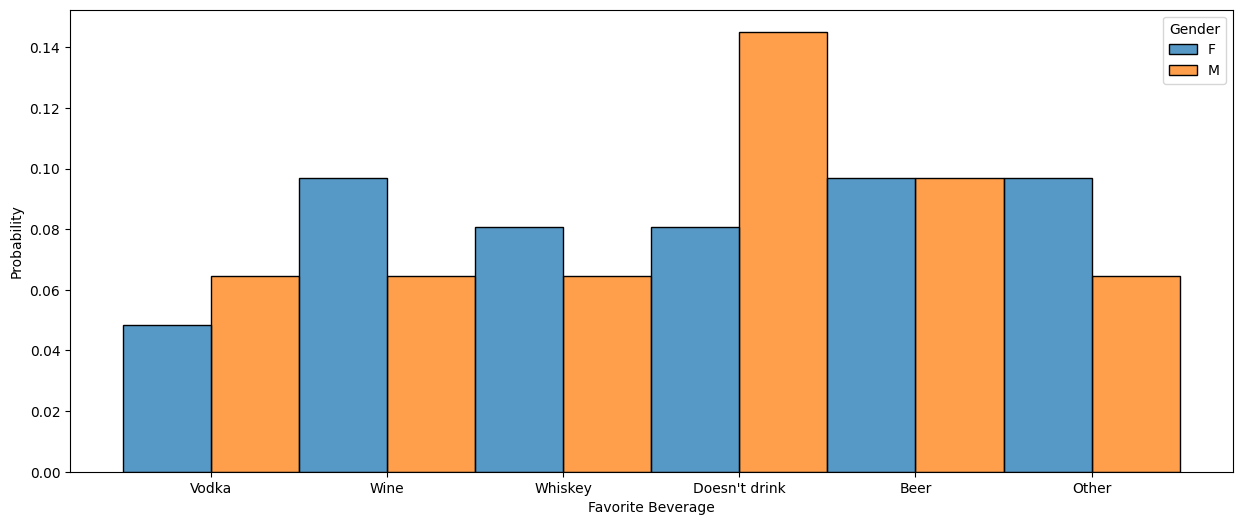

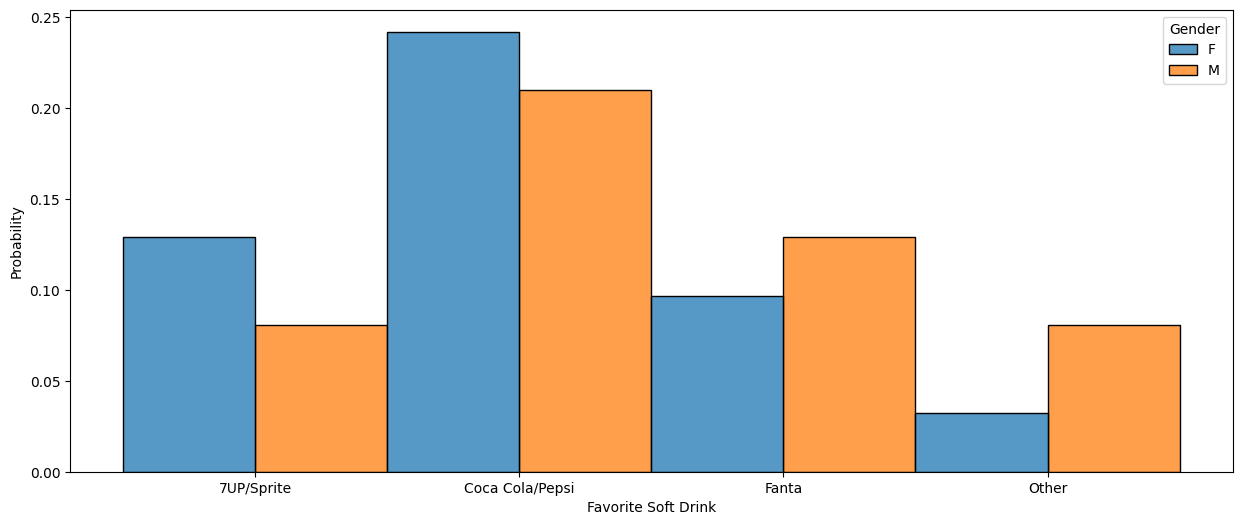

In [11]:
for col in df.columns[:-1]:
  plt.figure(figsize=(15, 6))
  sns.histplot(data=df, x=col, hue='Gender', multiple="dodge", stat='probability')
  plt.show()

In [12]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
x=df.drop(columns='Gender')
y=df['Gender']
x=pd.get_dummies(x, drop_first=True).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [104]:
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [105]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9565217391304348
Test Accuracy: 0.75


I don't know if this is a good accuracy or not